In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Example HTML string

#### Advanced Example

##### Scraping data science skills from Indeed.com

Get the website data.

In [287]:
from urllib.request import urlopen
my_url = 'https://www.indeed.com/jobs?q="data+scientist"&l=New+York%2C+NY'
source = urlopen(my_url).read()

soup = BeautifulSoup(source, 'lxml')

Find out how many jobs are listed on Indeed.

In [288]:
soup.find(id='searchCountPages').contents[0].strip()

'Page 1 of 868 jobs'

In [289]:
num_of_jobs = soup.find(id='searchCountPages').contents[0].strip().split()[-2]
num_of_jobs = int(num_of_jobs.replace(',',''))

print(f"There are {num_of_jobs} Data Scientits jobs listed on Indeed.com in New York City")

There are 868 Data Scientits jobs listed on Indeed.com in New York City


The website lists only 10 jobs per page. We will get all the listing.

In [291]:
import time

def get_indeed():

    num_pages = int(np.ceil(num_of_jobs)/10)
    
    base_url = "http://www.indeed.com"


    # We will get results for only first 20 pages
    for i in range(num_pages):

        url = 'https://www.indeed.com/jobs?q="data+scientist"&l=New+York%2C+NY&start=' + str(i*10)

        html_page = requests.get(url).text
        soup = BeautifulSoup(html_page)
        job_link_area = soup.find(id = 'resultsCol')
        job_postings = job_link_area.find_all('div')
        _blank = []
        for jp in job_postings:
            if jp.get('class'):
                _ = jp.find('a', class_ = "jobtitle turnstileLink ")
                _blank.append((_))
                
        _title = []
        _links = []
        for ix in _blank:
            if ix != None:
                _title.append(ix.text)
                _links.append(ix['href'])
                
        _title = [t.strip() for t in _title]
        _links = [i for i in _links if i[:8] != '/pagead/']
        
        _title = list(set(_title))
        _links = list(set(_links))
        _links = [str("https://www.indeed.com") + i for i in _links]
        
        title.append(_title)
        links.append(_links)
        
        sleep = np.random.randint(low = 1, high = 4, size = 1)
        
        print(f"Finished gathering data for page {i}")
                
        time.sleep(sleep)
                
            
            

    
    

In [292]:
title = []
links = []
get_indeed()

Finished gathering data for page 0
Finished gathering data for page 1
Finished gathering data for page 2
Finished gathering data for page 3
Finished gathering data for page 4
Finished gathering data for page 5
Finished gathering data for page 6
Finished gathering data for page 7
Finished gathering data for page 8
Finished gathering data for page 9
Finished gathering data for page 10
Finished gathering data for page 11
Finished gathering data for page 12
Finished gathering data for page 13
Finished gathering data for page 14
Finished gathering data for page 15
Finished gathering data for page 16
Finished gathering data for page 17
Finished gathering data for page 18
Finished gathering data for page 19
Finished gathering data for page 20
Finished gathering data for page 21
Finished gathering data for page 22
Finished gathering data for page 23
Finished gathering data for page 24
Finished gathering data for page 25
Finished gathering data for page 26
Finished gathering data for page 27
Fi

In [293]:
def flatten(your_list):

  flat_list = []
  
  for sublist in your_list:
    for item in sublist:
      flat_list.append(item)
  return flat_list



In [298]:
flat_links = flatten(links)
flat_title = flatten(title)

In [305]:
pwd

'E:\\Documents\\Learning\\CS109_Harvard'

In [308]:
links_df = pd.DataFrame({'links':flat_links})

#Saving Links
#Uncomment this if you want to save the data
#links_df.to_csv('indeed_links.csv',index=False)

In [ ]:
skill_set = {'Python': 0, 'R': 0, 'SQL':0, 'Java':0, 'C++':0, 'Scala':0}
count = 0
#Trying for first 100 jobs
for i in flat_links[:101]:
    
    try:
        html_page = requests.get(i).text
    except requests.HTTPError:
        print('HTTPError')
    except requests.ConnectionError:
        print('ConnectionError')
    except requests.ConnectTimeout:
        print('ConnectTimeout')
    except requests.Timeout:
        print('Timeout')
        
        continue
        
    soup = BeautifulSoup(html_page, 'lxml')
    job_descr = soup.find('div', class_="jobsearch-jobDescriptionText").text.strip()
    
    for key in skill_set.keys():
        if key in job_descr:  
            skill_set[key] +=1
            
    sleep = np.random.randint(low = 2, high = 5, size = 1)
    
    print(f"Finished getting data for {count+1} job!")
    count += 1
    time.sleep(sleep)
            

In [316]:
skill_set

{'C++': 6, 'Java': 17, 'Python': 87, 'R': 97, 'SQL': 66, 'Scala': 13}

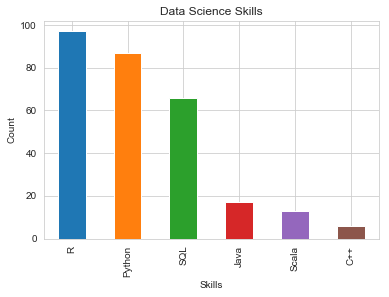

In [326]:
import seaborn as sns
sns.set_style('whitegrid') 

skill_series = pd.Series(skill_set)
skill_series.sort_values(ascending=False).plot(kind = 'bar')
plt.title('Data Science Skills')
plt.xlabel('Skills')
plt.ylabel('Count')
plt.show()